<a href="https://colab.research.google.com/github/bsmrvl/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

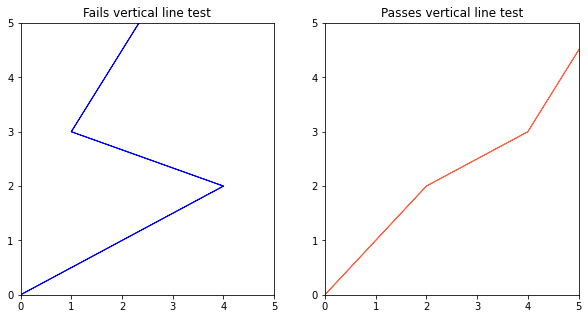

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=[10,5])
ax[0].set_xlim([0,5])
ax[0].set_ylim([0,5])
ax[1].set_xlim([0,5])
ax[1].set_ylim([0,5])

ax[0].arrow(0,0,4,2, color='blue')
ax[0].arrow(4,2,-3,1, color='blue')
ax[0].arrow(1,3,2,3, color='blue')
ax[0].set_title('Fails vertical line test')

ax[1].arrow(0,0,2,2, color='tomato')
ax[1].arrow(2,2,2,1, color='tomato')
ax[1].arrow(4,3,2,3, color='tomato')
ax[1].set_title('Passes vertical line test')

plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Graphs that don't pass the vertical line test represent relations in which inputs can have more than one possible output. Functions must have only one possible output for each input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only Relation 2 is a function. All the others have multiple y-values for one x-value.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In the first, the dimensionality of both domain and codomain is 3. 

In the second, the dimensionality of theh domain is 4, while that of the codomain is 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

I reckon so, maybe something like this:

\begin{align}
m(𝑥_1,𝑥_2)=(x_1+x_2, x_1x_2, 2x_2-x_1)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [ ]:
import numpy as np

P = np.array([[1,3],[-1,2]])
Q = np.array([[4,1,2],[-1,2,3],[5,1,-2]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [ ]:
input1 = np.array([[3],[-7]])

# p, traditional

print(1*3 + 3*-7)
print(2*-7 - 1*3)

-18
-17


In [ ]:
# p, using transformation matrix P

np.matmul(P,input1)

array([[-18],
       [-17]])

In [ ]:
input2 = np.array([[2],[-2],[-3]])

# q, traditional

print(4*2 + 1*-2 + 2*-3)
print(2*-2 - 1*2 + 3*-3)
print(5*2 - 2*-3 + 1*-2)

0
-15
14


In [ ]:
# q, using transformation matrix Q

np.matmul(Q, input2)

array([[  0],
       [-15],
       [ 14]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors which do not change direction under a matrix transformation. However, they may change in magnitude, a value given by the corresponding eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The main challenge is the exponentially growing computational requirements. Each added dimension makes it much harder for a computer to make all possible comparisons. The other challenge is a potential for overfitting our model to a lot of irrelevant or redundant data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

One should try to have at least 5 times as many observations as parameters.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [28]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [29]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [30]:
# check for null values
national.isnull().sum().any()

False

In [31]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [32]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [33]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [34]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [200]:
### Your Code Here

from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

Z = scaler.fit_transform(national_processed)
Z

array([[-1.73202397,  1.48807451,  0.60878419, ...,  0.54947295,
        -0.46210707,  0.        ],
       [-1.73197029,  0.08881241,  2.18426992, ..., -0.54470863,
        -0.46210707,  0.        ],
       [-1.73191661,  0.21999323,  2.18426992, ...,  1.64365453,
        -0.46210707,  0.        ],
       ...,
       [ 1.73191661, -1.09181499, -0.17895868, ...,  1.64365453,
         2.16400067,  0.        ],
       [ 1.73197029,  0.39490099, -0.96670154, ..., -0.54470863,
         2.16400067,  0.        ],
       [ 1.73202397,  0.78844346,  1.39652706, ..., -0.54470863,
        -0.46210707,  0.        ]])

In [201]:
# We'll keep all the components, but then show that we only need 
# the first 20 or so in the graph at the bottom.

pca = PCA()

pca.fit(Z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [202]:
B = pca.transform(Z)

In [204]:
# Fairly useless overview... Let's make our graph.

transformed = pd.DataFrame(B)
transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,-2.576570,-1.376127,-1.253835,-0.619882,1.592855,-2.529629,-1.024384,2.038971,0.743631,-0.981357,-0.958024,-0.983633,-0.124320,2.130272,-0.232511,-1.259668,-1.811215,0.800230,0.157496,0.057891,0.076233,-0.303851,0.234631,0.311692,1.414847,0.665575,0.206075,0.297168,-0.885343,-1.100812,0.017568,-0.296827,-0.045226,0.328718,-0.227059,-0.206567,0.105183,0.209632,-0.452949,0.487132,...,-0.022755,-0.005380,0.017097,0.017509,0.007771,-0.001771,-0.005635,0.002438,0.000044,-1.560361e-12,-2.277077e-12,-7.242113e-12,-2.795351e-12,1.373502e-13,2.899793e-12,-1.396600e-12,5.031310e-12,-1.451706e-12,8.481819e-17,9.524272e-16,5.168272e-17,-8.338726e-17,-3.645024e-16,8.492261e-17,-6.222504e-16,1.465679e-16,1.841878e-17,-3.813348e-16,-4.044924e-16,6.599287e-17,5.655265e-16,2.114880e-16,-6.750893e-16,-6.952525e-16,-1.171650e-16,-6.244074e-17,-1.727434e-16,-3.724245e-17,3.675415e-17,0.0
1,2.040643,-0.988061,-2.237999,-2.987403,2.160320,1.220875,1.076368,-0.681369,0.948055,-0.182382,-0.690309,0.670541,-0.312950,0.160716,0.063940,-0.032742,-1.310611,-0.029583,-0.320912,-1.213295,0.082541,-0.438037,-0.140961,-0.417153,0.129375,-0.373254,0.162462,0.426850,-0.294672,1.196620,0.034442,0.739189,-0.334534,-0.349723,-0.051191,0.107043,0.952603,0.199457,0.022768,0.199969,...,-0.065489,0.030766,-0.021506,-0.014176,0.010088,0.000578,-0.010665,-0.002009,-0.000083,1.985503e-11,1.696739e-11,-1.820463e-11,-4.568840e-12,-8.938972e-12,-1.002130e-11,3.035041e-12,-1.878946e-12,-7.527095e-12,4.685656e-16,-5.562080e-16,-4.505784e-16,3.383873e-16,-2.018761e-16,2.210086e-16,2.119384e-16,-2.258892e-16,4.160005e-16,5.571971e-16,1.093916e-16,-1.681332e-16,-9.805863e-18,-4.415298e-16,1.137681e-16,-1.904986e-16,-1.185672e-16,1.324673e-16,-4.713731e-16,-8.283218e-17,4.092845e-16,0.0
2,1.215270,0.370168,-3.248606,-2.123899,1.229951,-2.559945,0.984291,0.088488,-0.209300,-0.715159,-0.243996,1.168680,-0.136100,0.491252,0.358669,-0.462415,-1.494570,0.114951,-0.160159,-0.889462,0.678651,-0.002222,0.162761,-0.738769,-0.844579,0.332651,-0.014602,0.525549,-0.134705,0.832489,-0.366875,0.429854,-0.639612,-0.112777,-0.114059,0.258893,0.974611,0.167855,0.177374,-0.033658,...,-0.037108,0.019828,-0.032203,0.003294,0.006182,0.000272,-0.008307,0.000210,0.000053,-3.011547e-11,-3.448317e-11,-2.704562e-12,-1.343215e-11,3.055475e-11,-1.853681e-11,6.517715e-12,1.170878e-11,2.918100e-11,5.114780e-16,-4.196937e-16,4.278268e-16,-4.912517e-16,5.251804e-16,-5.221105e-16,-2.901619e-16,1.403775e-16,8.267054e-16,7.336866e-17,1.330838e-16,4.265692e-16,2.700908e-16,-4.683963e-16,5.877623e-17,-3.197594e-16,-2.792367e-16,5.900722e-17,-1.559745e-16,7.490558e-16,2.181185e-16,0.0
3,2.821837,1.723711,-4.375157,-1.479343,0.085327,-1.755050,0.710440,-0.064843,0.487051,-0.175074,-0.947811,0.273949,-0.083829,-0.606772,-0.058791,0.293943,-1.319074,1.225816,-0.688633,-0.437567,-0.155818,-0.934189,0.070781,0.082882,0.259157,-0.305200,-0.157419,0.136505,-0.678651,0.363593,-0.497262,0.453585,0.099106,0.302715,-0.319196,0.502472,-0.056209,0.043986,0.284494,0.152548,...,0.051131,-0.016479,0.032716,-0.001735,-0.006142,-0.000083,0.003233,0.000369,0.000047,1.570992e-11,-2.955718e-11,-4.246079e-11,-3.625682e-11,-3.904295e-11,-8.908407e-12,2.530021e-12,7.073106e-12,3.749479e-13,6.889951e-16,-1.699880e-16,1.184372e-15,-1.414496e-16,3.276507e-16,-1.913601e-16,-4.107119e-16,2.098357e-16,-3.721625e-17,-6.608116e-17,-1.188354e-17,2.939130e-17,5.617494e-17,-2.005675e-16,1.295229e-16,-2.362493e-16,-2.966576e-16,3.637921e-16,6.209578e-17,1.751248e-16,5.402790e-16,0.0
4,-1.570106,-0.878362,-3.307062,0.785881,-2.310400,3.881736,-0.645952,0.464725,-0.092147,0.439502,0.680427,1.297333,-2.176527,0.873973,-1.258729,0.078789,-1.274484,-1.278863,-0.049121,-1.107579,-1.315707,0.183007,-0.463981,-0.126541,-0.6328

In [206]:
# Create array of component variances, then check total variance.

pca_variance = np.var(B, axis=0)
pca_variance.sum()

97.99999999999972

In [207]:
# Normalize to percentage

variance_total = pca_variance.sum()

pca_variance = np.array([var / variance_total * 100 for var in pca_variance])
pca_variance.sum()

100.0

In [208]:
# Make cumulative variance array

pca_variance_cum = np.cumsum(pca_variance)

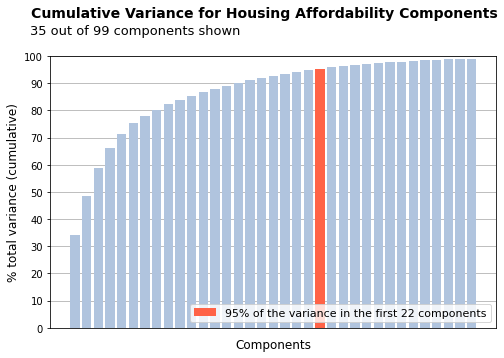

In [210]:
fig, ax = plt.subplots(figsize=[8,5])

fig.set_facecolor('white')

ax.set_xlabel('Components', fontsize=12, labelpad=10)
ax.set_xticks([])
ax.set_ylabel('% total variance (cumulative)', fontsize=12)
ax.set_ylim([0,100])
ax.set_yticks([t*10 for t in range(11)])


#### Try changing these values! Control how many components are shown in the graph,
#### and what threshold percentage we want to check.

show = 35              
percent_thresh = 95     

####
####

# Main bars
rects = ax.bar(x=[num for num in range(show)], height=pca_variance_cum[:show], color='lightsteelblue', zorder=100)

# Function to determine the point at which the threshold is passed
def percent_of_variance(rects, percent):
  for i in range(len(rects)):
    if rects[i].get_height() > percent:
      return i

# Run function and print tomato bar.
first = percent_of_variance(rects, percent_thresh)
thresh = ax.bar(x=first, height=pca_variance_cum[first], color='tomato', zorder=200)

ax.set_title('Cumulative Variance for Housing Affordability Components', fontsize=14, fontweight='bold', x=.48, y=1.12)
ax.text(s=str(show) + ' out of 99 components shown', x=-3.9, y=108, fontsize=13)

ax.grid(b=True, axis='y')
ax.legend([thresh],[str(percent_thresh) + '% of the variance in the first ' + str(first+1) + ' components'], loc='lower right', fontsize=11).set_zorder(300)

plt.show()

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)